# Projet Steganographie texte dans une image rbv

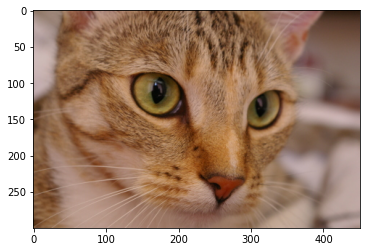

(300, 451, 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

img = skimage.data.chelsea()
# img = skimage.color.rgb2gray(img)
plt.imshow(img)
plt.show()
print(img.shape)

## Etape 1 : transformer chaque caractère en code ASCII puis binaire

In [2]:
message = "Aujourd'hui il fait beau"

In [3]:
liste_ascii = []
for car in message :
  ordre = ord(car) # transformer chaque lettre en code ascii
  lettre_asci = bin(ordre)
  lettre_asci = lettre_asci[2:].zfill(8)
  liste_ascii.append(lettre_asci)

print(liste_ascii)

['01000001', '01110101', '01101010', '01101111', '01110101', '01110010', '01100100', '00100111', '01101000', '01110101', '01101001', '00100000', '01101001', '01101100', '00100000', '01100110', '01100001', '01101001', '01110100', '00100000', '01100010', '01100101', '01100001', '01110101']


## Etape 2 : Avoir l'image en binaire

In [4]:
img_bin = np.chararray((img.shape[0], img.shape[1], img.shape[2]), itemsize=8)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    for k in range(img.shape[2]):
      img_bin[i,j,k] = bin(img[i,j,k])[2:].zfill(8)

img_bin = img_bin.decode("utf-8")

On flatten l'image pour itérer plus facilement

In [5]:
img_bin_flat = img_bin.flatten()
img_bin_flat.shape

(405900,)

## Etape 3 : Encoder image

In [6]:
chiffres = ""
for i in range(len(liste_ascii)):
  chiffres += liste_ascii[i]

chiffres

'010000010111010101101010011011110111010101110010011001000010011101101000011101010110100100100000011010010110110000100000011001100110000101101001011101000010000001100010011001010110000101110101'

On remplace le dernier bit de chaque couleur de chaque pixel par les bits qu'on veut cacher

In [7]:
img_encoded_bin = img_bin_flat.copy()

for i in range(len(chiffres)):
  img_encoded_bin[i] = img_encoded_bin[i][:7] + chiffres[i]

On va reshape l'image qui est maintenant encodé

In [8]:
img_encoded_bin

array(['10001110', '01111001', '01101000', ..., '10100010', '10001010',
       '10000000'], dtype='<U8')

In [9]:
img_reshaped = np.reshape(img_encoded_bin,img.shape)

In [10]:
img_reshaped.shape

(300, 451, 3)

In [11]:
img_encoded = img.copy()

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    for k in range(img.shape[2]):
      img_encoded[i,j,k] = int(img_reshaped[i,j,k],2)

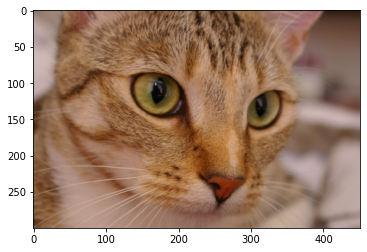

In [12]:
plt.imshow(img_encoded)
plt.show()

## Etape 4 : Decoder le message

In [13]:
def find_secret_message(image_encoded):

  # on la met en binaire
  lig, col, couleur =  image_encoded.shape
  image_bin = np.chararray((lig, col, couleur), itemsize=8)

  for i in range(lig):
    for j in range(col):
      for k in range(couleur):
        image_bin[i,j,k] = bin(image_encoded[i,j,k])[2:].zfill(8)

  image_bin = image_bin.decode("utf-8")

  # On récupère les derniers bits de chaque rvb de chaque pixel
  image_bin_flat = image_bin.flatten()

  message_encoded_bin = []
  secret_message = ""
  lsb = ""
  count = 0

  for i in range(1,200):
    lsb += image_bin_flat[i-1][7]

    if (i%8 == 0) & (i != 0):
      message_encoded_bin.append(lsb)
      lsb = ""

  message_encoded_ascii = [None]*len(message_encoded_bin)

  for i in range(len(message_encoded_bin)):
    message_encoded_ascii[i] = chr(int(message_encoded_bin[i],2))

  message = ''.join(message_encoded_ascii)

  return message

In [14]:
secret_message = find_secret_message(img_encoded)
print(secret_message)

Aujourd'hui il fait beau
